In [157]:
# Import packages
import pandas as pd # enables us to read csv and excel files
import geopandas as gpd
%matplotlib inline 

# Zip Codes

In [158]:
# Read in the zip code GeoJson file from Github and look at the first few rows.
url = "https://raw.githubusercontent.com/ok-dk/dagi/master/geojson/postnumre.geojson" 
zipcode = gpd.read_file(url)

# Use correct coordinate reference system
#zipcode.to_crs(epsg=25832, inplace=True) 

# inspect data
zipcode.head()

,POSTNR_TXT,POSTBYNAVN,geometry
0,2800,Kongens Lyngby,"POLYGON Z ((12.50455 55.80083 -999.00000, 12.5..."
1,6310,Broager,"POLYGON Z ((9.70544 54.90168 -999.00000, 9.702..."
2,4941,Bandholm,"POLYGON Z ((11.42392 54.84050 -999.00000, 11.4..."
3,5985,Søby Ærø,"POLYGON Z ((10.27247 54.90163 -999.00000, 10.2..."
4,7770,Vestervig,"POLYGON Z ((8.30876 56.72704 -999.00000, 8.308..."


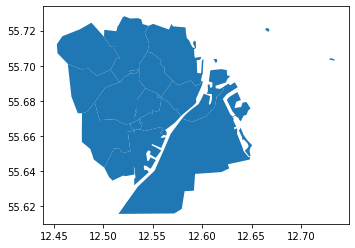

In [159]:
# Fetch zip codes the for municipalities of Copenhagen and Frederiksberg
cph_list = ['København K', 'København Ø', 'København V', 'København SV', 'København NV', 'København N', 'København S', 'Vanløse', 'Brønshøj', 'Valby', 'Frederiksberg', 'Frederiksberg C'] 
zipcode_cph = zipcode.loc[zipcode['POSTBYNAVN'].isin(cph_list)]

#zipcode_cph.head() 

# Plot the zip codes without any additional arguments
zipcode_cph.plot();

# Final data on zip codes

In [160]:
zipcode_cph

,POSTNR_TXT,POSTBYNAVN,geometry
19,1000-1499,København K,"POLYGON Z ((12.57779 55.67076 -999.00000, 12.5..."
20,1000-1499,København K,"POLYGON Z ((12.58973 55.66791 -999.00000, 12.5..."
21,1000-1499,København K,"POLYGON Z ((12.61383 55.70149 -999.00000, 12.6..."
22,1000-1499,København K,"POLYGON Z ((12.72910 55.70326 -999.00000, 12.7..."
23,1000-1499,København K,"POLYGON Z ((12.66654 55.71938 -999.00000, 12.6..."
30,2720,Vanløse,"POLYGON Z ((12.47854 55.67286 -999.00000, 12.4..."
61,1800-1899,Frederiksberg C,"POLYGON Z ((12.53578 55.66957 -999.00000, 12.5..."
357,2100,København Ø,"POLYGON Z ((12.59914 55.69132 -999.00000, 12.5..."
359,2200,København N,"POLYGON Z ((12.55804 55.68200 -999.00000, 12.5..."
419,2400,København NV,"POLYGON Z ((12.50747 55.69764 -999.00000, 12.5..."


# Charging Stations (EV)

### Charging Stations Frederiksberg

In [161]:
charging_stations_frederiksberg = gpd.read_file('charging_stations_frederiksberg.geojson')

charging_stations_frederiksberg.head()

,gid,nr_kort,adgangsadresse,beliggenhed_anført,operatoer,ladestandere,ladere,pladser,pladser_uden_delebiler,forbeholdt_elbiler,elbilpladser_ialt,mulige_ekstra_pladser,placering,opladning_pct_af_tid,note,dato_aendret,geometry
0,31,None,Frederiksberg Bredegade 20,P-plads bag Rådhuset,E.ON,1,3,0,2,0,2,0,Offentlig,NaN,Hurtiglader,None,MULTIPOINT (12.52847 55.67885)
1,14,29,Frederiksberg Bredegade 2,Frederiksberg Rådhus Parkeringsplads,Clever,1,2,0,2,0,2,0,Offentlig,NaN,None,2017-11-28T13:18:39,MULTIPOINT (12.52837 55.67886)
2,15,23,Frederiksberg Bredegade 2,Frederiksberg Bredegade 2,E.ON,3,6,1,3,0,4,2,Offentlig,0.13,None,2017-11-28T13:18:39,MULTIPOINT (12.53101 55.67799)
3,18,26,Hovedvejen 7A,"Frederiksberg Hospital, Vej 1",Clever,1,2,0,0,2,2,0,Privat (Frederiksberg Hospital),NaN,None,2017-11-28T13:18:39,MULTIPOINT (12.52447 55.68515)
4,23,18,P.G. Ramms Alle 1,P.G. Ramms Allé 1,E.ON,1,2,1,1,0,2,0,Offentlig,0.18,None,2017-11-28T13:18:39,MULTIPOINT (12.51158 55.67907)


In [162]:
#charging_stations_frederiksberg.to_crs(epsg=25832, inplace=True) 
#charging_stations_frederiksberg

In [163]:
#charging_stations_frederiksberg.to_crs(epsg=25832, inplace=True) 
charging_stations_frederiksberg.rename(columns = {'gid':'id', 'adgangsadresse':'vejnavn'}, inplace = True)

cs_frederiksberg = charging_stations_frederiksberg[['id', 'vejnavn','geometry']]
cs_frederiksberg.head()

,id,vejnavn,geometry
0,31,Frederiksberg Bredegade 20,MULTIPOINT (12.52847 55.67885)
1,14,Frederiksberg Bredegade 2,MULTIPOINT (12.52837 55.67886)
2,15,Frederiksberg Bredegade 2,MULTIPOINT (12.53101 55.67799)
3,18,Hovedvejen 7A,MULTIPOINT (12.52447 55.68515)
4,23,P.G. Ramms Alle 1,MULTIPOINT (12.51158 55.67907)


### Charging Stations Municipality of Copenhagen

In [164]:
url = 'https://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=k101:elbil_ladestander_i_drift&outputFormat=application%2Fjson&srsname=epsg:4326'
charging_stations_copenhagen_municipality = gpd.read_file(url)

# Inspect data
charging_stations_copenhagen_municipality.head()

,id,vejnavn,husnr,betalingszone,tidsbegraensning,ladestandertype,antal_udtag,position,operatoer,faerdigmeldingsdato,faerdigmelding_operatoer,faerdigmelding_smede,bem,status,edoc_sagsnr,reg_dato,opdateret_dato,geometry
0,3,Rådmandsgade,None,Gul takstzone,None,22 kW,2,None,CLEVER A/S,None,None,2020-10-19,None,I drift,2020-0053917,None,None,MULTIPOINT (12.55389 55.70151)
1,626,Brøndkærvej,2,Gul takstzone,None,22 kW,2,None,CLEVER A/S,None,2022-02-24,None,Skiltning er bestilt,I drift,2021-0138513,None,None,MULTIPOINT (12.51782 55.66739)
2,627,Brøndkærvej,2,Gul takstzone,None,22 kW,2,None,CLEVER A/S,None,2022-02-24,None,Skiltning er bestilt,I drift,2021-0138513,None,None,MULTIPOINT (12.51773 55.66742)
3,628,Brøndkærvej,2,Gul takstzone,None,22 kW,2,None,CLEVER A/S,None,2022-02-24,None,Skiltning er bestilt,I drift,2021-0138513,None,None,MULTIPOINT (12.51762 55.66744)
4,629,Brøndkærvej,2,Gul takstzone,None,22 kW,2,None,CLEVER A/S,None,2022-02-24,None,Skiltning er bestilt,I drift,2021-0138513,None,None,MULTIPOINT (12.51753 55.66747)


In [165]:
#charging_stations_copenhagen_municipality.to_crs(epsg=25832, inplace=True) 

# Keep relevant columns
cs_cm = charging_stations_copenhagen_municipality[['id', 'vejnavn','geometry']]
#cs_cm.head()

### Charging Stations Copenhagen 

In [166]:
# Concatenating DataFrames
combine_dfs = [cs_cm, cs_frederiksberg]
Copenhagen_charging_stations = pd.concat(combine_dfs)
Copenhagen_charging_stations.reset_index(inplace=True, drop=True) # <-- reset index

Copenhagen_charging_stations

,id,vejnavn,geometry
0,3,Rådmandsgade,MULTIPOINT (12.55389 55.70151)
1,626,Brøndkærvej,MULTIPOINT (12.51782 55.66739)
2,627,Brøndkærvej,MULTIPOINT (12.51773 55.66742)
3,628,Brøndkærvej,MULTIPOINT (12.51762 55.66744)
4,629,Brøndkærvej,MULTIPOINT (12.51753 55.66747)
...,...,...,...
725,25,Sankt Thomas Alle 19,MULTIPOINT (12.54740 55.67486)
726,26,Solbjerg Plads 3,MULTIPOINT (12.53084 55.68154)
727,27,Steenstrups Alle 13,MULTIPOINT (12.55148 55.68137)
728,28,Thurøvej 3,MULTIPOINT (12.52480 55.68355)


### Plotting Charging stations

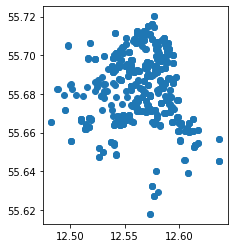

In [167]:
# Plot the charging stations without any additional arguments
Copenhagen_charging_stations.plot();

#### Plot with Basemap using Folium

In [168]:
import folium
# Create array for folium called urban_location
Copenhagen_location = [55.6761, 12.5689]

# Construct a folium map with copenhagen_location
Copenhagen_map = folium.Map(
    location=Copenhagen_location,
    zoom_start=12
)

# Insert ladestandere
folium.GeoJson(Copenhagen_charging_stations).add_to(Copenhagen_map)

# Display the map
display(Copenhagen_map)

### Extract lattitude and longitude

To extract lattitude and longitude we will use regular expression, therefore we import the following package:

In [169]:
# Import packages
import re
import numpy as np

In [195]:
Copenhagen_charging_stations['geometry_str'] = Copenhagen_charging_stations['geometry'].astype(str)
Copenhagen_charging_stations

,id,vejnavn,geometry,lng,lat,geometry_str
0,3,Rådmandsgade,MULTIPOINT (12.55389 55.70151),55.701506,12.553887,MULTIPOINT (12.55388686349459 55.70150594054824)
1,626,Brøndkærvej,MULTIPOINT (12.51782 55.66739),55.667395,12.517818,MULTIPOINT (12.5178184694157 55.66739453477894)
2,627,Brøndkærvej,MULTIPOINT (12.51773 55.66742),55.667419,12.517726,MULTIPOINT (12.51772557295722 55.66741876280089)
3,628,Brøndkærvej,MULTIPOINT (12.51762 55.66744),55.667443,12.517625,MULTIPOINT (12.51762476304165 55.6674425332664)
4,629,Brøndkærvej,MULTIPOINT (12.51753 55.66747),55.667466,12.517530,MULTIPOINT (12.51753002367943 55.66746647174671)
...,...,...,...,...,...,...
725,25,Sankt Thomas Alle 19,MULTIPOINT (12.54740 55.67486),55.674861,12.547405,MULTIPOINT (12.54740497426069 55.67486113867896)
726,26,Solbjerg Plads 3,MULTIPOINT (12.53084 55.68154),55.681543,12.530840,MULTIPOINT (12.53083991033914 55.68154292649228)
727,27,Steenstrups Alle 13,MULTIPOINT (12.55148 55.68137),55.681369,12.551475,MULTIPOINT (12.5514752674071 55.68136906282076)
728,28,Thurøvej 3,MULTIPOINT (12.52480 55.68355),55.683548,12.524801,MULTIPOINT (12.52480121103149 55.68354750639479)


In [212]:
# define reg pattern
lat_lng_pattern = re.compile(r"\((.*) \s*(.*)\)")

# define function for extraction (should be placed in `.py` module!)
def extract_lng_lat(address):
    try: 
        lng_lat_match = lat_lng_pattern.search(address)
        lng = float(lng_lat_match.group(1))
        lat = float(lng_lat_match.group(2))
        return (lng,lat)
    except:
        return (np.NaN, np.NaN)

lng_lats = [extract_lat_lng(location) for location in Copenhagen_charging_stations.loc[:,'geometry_str']]
Copenhagen_charging_stations['lng'] = [lat for lat, lng in lng_lats]
Copenhagen_charging_stations['lat'] =  [lng for lat, lng in lng_lats]
Copenhagen_charging_stations.head()

,id,vejnavn,geometry,lng,lat,geometry_str
0,3,Rådmandsgade,MULTIPOINT (12.55389 55.70151),12.553887,55.701506,MULTIPOINT (12.55388686349459 55.70150594054824)
1,626,Brøndkærvej,MULTIPOINT (12.51782 55.66739),12.517818,55.667395,MULTIPOINT (12.5178184694157 55.66739453477894)
2,627,Brøndkærvej,MULTIPOINT (12.51773 55.66742),12.517726,55.667419,MULTIPOINT (12.51772557295722 55.66741876280089)
3,628,Brøndkærvej,MULTIPOINT (12.51762 55.66744),12.517625,55.667443,MULTIPOINT (12.51762476304165 55.6674425332664)
4,629,Brøndkærvej,MULTIPOINT (12.51753 55.66747),12.517530,55.667466,MULTIPOINT (12.51753002367943 55.66746647174671)


# THIS IS THE FINAL DATA WE NEED on Charging Stations

In [213]:
Copenhagen_charging_stations = Copenhagen_charging_stations.drop('geometry_str', axis=1)
Copenhagen_charging_stations

,id,vejnavn,geometry,lng,lat
0,3,Rådmandsgade,MULTIPOINT (12.55389 55.70151),12.553887,55.701506
1,626,Brøndkærvej,MULTIPOINT (12.51782 55.66739),12.517818,55.667395
2,627,Brøndkærvej,MULTIPOINT (12.51773 55.66742),12.517726,55.667419
3,628,Brøndkærvej,MULTIPOINT (12.51762 55.66744),12.517625,55.667443
4,629,Brøndkærvej,MULTIPOINT (12.51753 55.66747),12.517530,55.667466
...,...,...,...,...,...
725,25,Sankt Thomas Alle 19,MULTIPOINT (12.54740 55.67486),12.547405,55.674861
726,26,Solbjerg Plads 3,MULTIPOINT (12.53084 55.68154),12.530840,55.681543
727,27,Steenstrups Alle 13,MULTIPOINT (12.55148 55.68137),12.551475,55.681369
728,28,Thurøvej 3,MULTIPOINT (12.52480 55.68355),12.524801,55.683548


# The following is explorative "research"

In [214]:
# go through the charging stations and print each part of tuple returned
for row in Copenhagen_charging_stations.iterrows():
  print('first part: ', row[0])
  print('second part: ', row[1])

# Create a location and marker with each iteration for the Copenhagen Map 
for row in Copenhagen_charging_stations.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
    marker = folium.Marker(location = location)
    marker.add_to(Copenhagen_map)

# Display the map
display(Copenhagen_map)

first part:  0
second part:  id                                                      3
vejnavn                                      Rådmandsgade
geometry    (POINT (12.55388686349459 55.70150594054824))
lng                                             12.553887
lat                                             55.701506
Name: 0, dtype: object
first part:  1
second part:  id                                                   626
vejnavn                                      Brøndkærvej
geometry    (POINT (12.5178184694157 55.66739453477894))
lng                                            12.517818
lat                                            55.667395
Name: 1, dtype: object
first part:  2
second part:  id                                                    627
vejnavn                                       Brøndkærvej
geometry    (POINT (12.51772557295722 55.66741876280089))
lng                                             12.517726
lat                                             55.667419
Na

### Plotting charging stations over map of zip codes

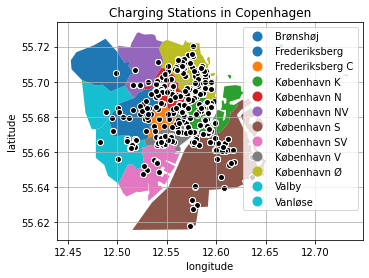

In [216]:
# Import package
import matplotlib.pyplot as plt

# Plot the zip codes, color them according to 'POSTBYNAVN', and show a legend
zipcode_cph.plot(column = 'POSTBYNAVN', legend = True)

# Add the charging station locations
plt.scatter(x=Copenhagen_charging_stations.lng, y=Copenhagen_charging_stations.lat, c='black', edgecolor = 'white')

# Add labels and title
plt.title('Charging Stations in Copenhagen')
plt.xlabel('longitude')
plt.ylabel('latitude')


# Add grid lines and show the plot
plt.grid()
plt.show()

#### Style legend

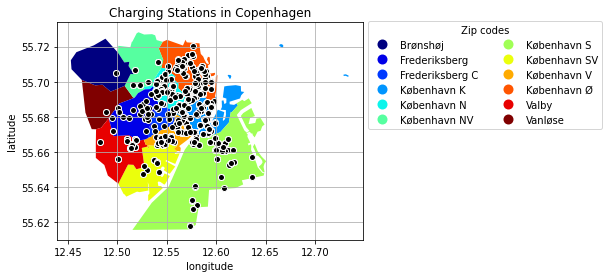

In [218]:
from matplotlib import cm

# Set legend style
lgnd_kwds = {'title': 'Zip codes',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 2}

# Plot the zip codes using the jet colormap
zipcode_cph.plot(column = 'POSTBYNAVN', cmap = 'jet', legend = True, legend_kwds = lgnd_kwds)

# Add the charging station locations
plt.scatter(x=Copenhagen_charging_stations.lng, y=Copenhagen_charging_stations.lat, c='black', edgecolor = 'white')

# Add charging stations and title
plt.title('Charging Stations in Copenhagen')
plt.xlabel('longitude')
plt.ylabel('latitude')

# Add grid lines and show the plot
plt.grid()

# Density Map

In [219]:
# Spatial join of charging stations and zip codes
ladestander_by_zipcode = gpd.sjoin(Copenhagen_charging_stations, zipcode_cph, predicate = 'within')

ladestander_by_zipcode.head()

,id,vejnavn,geometry,lng,lat,index_right,POSTNR_TXT,POSTBYNAVN
0,3,Rådmandsgade,MULTIPOINT (12.55389 55.70151),12.553887,55.701506,359,2200,København N
13,986,Bragesgade,MULTIPOINT (12.54346 55.69935),12.543463,55.699348,359,2200,København N
14,987,Bragesgade,MULTIPOINT (12.54341 55.69931),12.543414,55.699309,359,2200,København N
28,2,Guldbergsgade,MULTIPOINT (12.55453 55.69417),12.554533,55.694166,359,2200,København N
29,4,Guldbergsgade,MULTIPOINT (12.55459 55.69412),12.554588,55.694119,359,2200,København N


In [220]:
# Create ladestander counts
ladestander_by_zipcode_counts = ladestander_by_zipcode.groupby(['POSTBYNAVN']).size().sort_values(ascending=False)

print(ladestander_by_zipcode_counts)

POSTBYNAVN
København Ø        189
København K        131
København N        114
København V        106
København S         93
Valby               33
Frederiksberg       26
København NV        14
København SV        13
Frederiksberg C      7
Brønshøj             2
Vanløse              2
dtype: int64


To create a normalized value for the charging station in each zip code, we will need to find the area of each zip code. 
- we can leverage the area attribute of a GeoSeries to do this. 
- we will need to convert ladestander_by_zipcode_counts to a DataFrame so we can merge it with the zipcode data. 

In [221]:
zipcode_cph

,POSTNR_TXT,POSTBYNAVN,geometry
19,1000-1499,København K,"POLYGON Z ((12.57779 55.67076 -999.00000, 12.5..."
20,1000-1499,København K,"POLYGON Z ((12.58973 55.66791 -999.00000, 12.5..."
21,1000-1499,København K,"POLYGON Z ((12.61383 55.70149 -999.00000, 12.6..."
22,1000-1499,København K,"POLYGON Z ((12.72910 55.70326 -999.00000, 12.7..."
23,1000-1499,København K,"POLYGON Z ((12.66654 55.71938 -999.00000, 12.6..."
30,2720,Vanløse,"POLYGON Z ((12.47854 55.67286 -999.00000, 12.4..."
61,1800-1899,Frederiksberg C,"POLYGON Z ((12.53578 55.66957 -999.00000, 12.5..."
357,2100,København Ø,"POLYGON Z ((12.59914 55.69132 -999.00000, 12.5..."
359,2200,København N,"POLYGON Z ((12.55804 55.68200 -999.00000, 12.5..."
419,2400,København NV,"POLYGON Z ((12.50747 55.69764 -999.00000, 12.5..."


In [222]:
# create zip code that uses EPSG: 25832
zipcode_cph_25832 = zipcode_cph.to_crs(epsg = 25832)

# Create an area column in postnumre
zipcode_cph_25832['area'] = zipcode_cph_25832.area

In [223]:
zipcode_cph_25832.reset_index(drop=True, inplace=True)
zipcode_cph_25832

,POSTNR_TXT,POSTBYNAVN,geometry,area
0,1000-1499,København K,"POLYGON Z ((724979.120 6175241.190 -999.000, 7...",3.354994e+06
1,1000-1499,København K,"POLYGON Z ((725745.830 6174962.230 -999.000, 7...",3.282493e+06
2,1000-1499,København K,"POLYGON Z ((727066.000 6178776.000 -999.000, 7...",3.572400e+04
3,1000-1499,København K,"POLYGON Z ((734294.000 6179357.000 -999.000, 7...",2.905000e+04
4,1000-1499,København K,"POLYGON Z ((730271.000 6180939.000 -999.000, 7...",3.865350e+04
5,2720,Vanløse,"POLYGON Z ((718728.770 6175157.350 -999.000, 7...",5.493009e+06
6,1800-1899,Frederiksberg C,"POLYGON Z ((722345.520 6174972.730 -999.000, 7...",2.115442e+06
7,2100,København Ø,"POLYGON Z ((726202.000 6177597.000 -999.000, 7...",8.863794e+06
8,2200,København N,"POLYGON Z ((723673.530 6176426.790 -999.000, 7...",3.779241e+06
9,2400,København NV,"POLYGON Z ((720407.790 6178004.650 -999.000, 7...",7.144869e+06


In [224]:
value_kk = zipcode_cph_25832.area.iloc[0:4].sum()
value_kv = zipcode_cph_25832.area.iloc[14:16].sum()
value_ks = zipcode_cph_25832.area.iloc[-2:].sum()

In [225]:
zipcode_cph_25832.at[:4, ["area"]] = value_kk
zipcode_cph_25832.at[13:14, ["area"]] = value_kv
zipcode_cph_25832.at[16:17, ["area"]] = value_ks
zipcode_cph_25832

,POSTNR_TXT,POSTBYNAVN,geometry,area
0,1000-1499,København K,"POLYGON Z ((724979.120 6175241.190 -999.000, 7...",6.702261e+06
1,1000-1499,København K,"POLYGON Z ((725745.830 6174962.230 -999.000, 7...",6.702261e+06
2,1000-1499,København K,"POLYGON Z ((727066.000 6178776.000 -999.000, 7...",6.702261e+06
3,1000-1499,København K,"POLYGON Z ((734294.000 6179357.000 -999.000, 7...",6.702261e+06
4,1000-1499,København K,"POLYGON Z ((730271.000 6180939.000 -999.000, 7...",6.702261e+06
5,2720,Vanløse,"POLYGON Z ((718728.770 6175157.350 -999.000, 7...",5.493009e+06
6,1800-1899,Frederiksberg C,"POLYGON Z ((722345.520 6174972.730 -999.000, 7...",2.115442e+06
7,2100,København Ø,"POLYGON Z ((726202.000 6177597.000 -999.000, 7...",8.863794e+06
8,2200,København N,"POLYGON Z ((723673.530 6176426.790 -999.000, 7...",3.779241e+06
9,2400,København NV,"POLYGON Z ((720407.790 6178004.650 -999.000, 7...",7.144869e+06


In [226]:
# define variable for m^2 to km^2 and get area in kilometers squared
sqm_to_sqkm = 10**6
zipcode_cph_25832['area_km2'] = zipcode_cph_25832['area'] / sqm_to_sqkm

In [227]:
# Convert ladestander count to a DataFrame
ladestander_by_zipcode_counts_df = ladestander_by_zipcode_counts.to_frame()
ladestander_by_zipcode_counts_df.head()

,0
POSTBYNAVN,
København Ø,189
København K,131
København N,114
København V,106
København S,93


In [228]:
# Reset index and column names
ladestander_by_zipcode_counts_df.reset_index(inplace=True)
ladestander_by_zipcode_counts_df.columns = ['POSTBYNAVN', 'charging_stations_count']
ladestander_by_zipcode_counts_df.head()

,POSTBYNAVN,charging_stations_count
0,København Ø,189
1,København K,131
2,København N,114
3,København V,106
4,København S,93


In [229]:
# Merge zip codes and ladestander_by_zipcode_counts_df: 
zipcode_and_charging_station = pd.merge(zipcode_cph_25832,ladestander_by_zipcode_counts_df, on = 'POSTBYNAVN')
zipcode_and_charging_station.head(20)

,POSTNR_TXT,POSTBYNAVN,geometry,area,area_km2,charging_stations_count
0,1000-1499,København K,"POLYGON Z ((724979.120 6175241.190 -999.000, 7...",6.702261e+06,6.702261,131
1,1000-1499,København K,"POLYGON Z ((725745.830 6174962.230 -999.000, 7...",6.702261e+06,6.702261,131
2,1000-1499,København K,"POLYGON Z ((727066.000 6178776.000 -999.000, 7...",6.702261e+06,6.702261,131
3,1000-1499,København K,"POLYGON Z ((734294.000 6179357.000 -999.000, 7...",6.702261e+06,6.702261,131
4,1000-1499,København K,"POLYGON Z ((730271.000 6180939.000 -999.000, 7...",6.702261e+06,6.702261,131
5,2720,Vanløse,"POLYGON Z ((718728.770 6175157.350 -999.000, 7...",5.493009e+06,5.493009,2
6,1800-1899,Frederiksberg C,"POLYGON Z ((722345.520 6174972.730 -999.000, 7...",2.115442e+06,2.115442,7
7,2100,København Ø,"POLYGON Z ((726202.000 6177597.000 -999.000, 7...",8.863794e+06,8.863794,189
8,2200,København N,"POLYGON Z ((723673.530 6176426.790 -999.000, 7...",3.779241e+06,3.779241,114
9,2400,København NV,"POLYGON Z ((720407.790 6178004.650 -999.000, 7...",7.144869e+06,7.144869,14


In [230]:
zipcode_and_charging_station['charging_station_density'] = zipcode_and_charging_station.apply(lambda row: row.charging_stations_count / row.area_km2, axis = 1)

In [231]:
zipcode_and_charging_station

,POSTNR_TXT,POSTBYNAVN,geometry,area,area_km2,charging_stations_count,charging_station_density
0,1000-1499,København K,"POLYGON Z ((724979.120 6175241.190 -999.000, 7...",6.702261e+06,6.702261,131,19.545643
1,1000-1499,København K,"POLYGON Z ((725745.830 6174962.230 -999.000, 7...",6.702261e+06,6.702261,131,19.545643
2,1000-1499,København K,"POLYGON Z ((727066.000 6178776.000 -999.000, 7...",6.702261e+06,6.702261,131,19.545643
3,1000-1499,København K,"POLYGON Z ((734294.000 6179357.000 -999.000, 7...",6.702261e+06,6.702261,131,19.545643
4,1000-1499,København K,"POLYGON Z ((730271.000 6180939.000 -999.000, 7...",6.702261e+06,6.702261,131,19.545643
5,2720,Vanløse,"POLYGON Z ((718728.770 6175157.350 -999.000, 7...",5.493009e+06,5.493009,2,0.364099
6,1800-1899,Frederiksberg C,"POLYGON Z ((722345.520 6174972.730 -999.000, 7...",2.115442e+06,2.115442,7,3.309001
7,2100,København Ø,"POLYGON Z ((726202.000 6177597.000 -999.000, 7...",8.863794e+06,8.863794,189,21.322697
8,2200,København N,"POLYGON Z ((723673.530 6176426.790 -999.000, 7...",3.779241e+06,3.779241,114,30.164786
9,2400,København NV,"POLYGON Z ((720407.790 6178004.650 -999.000, 7...",7.144869e+06,7.144869,14,1.959448


In [232]:
# Change crs back to epsg 4326
zipcode_and_charging_station_4326 = zipcode_and_charging_station.to_crs(epsg = 4326)

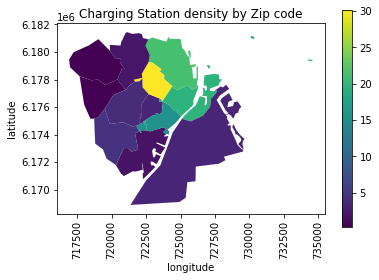

In [233]:
# Simple plot of charging stations density
zipcode_and_charging_station.plot(column = 'charging_station_density', legend = True)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.xticks(rotation = 'vertical')
plt.title('Charging Station density by Zip code')
plt.show();

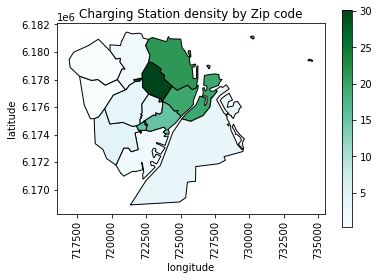

In [234]:
# Polished choropleth of charging station  
zipcode_and_charging_station.plot(column = 'charging_station_density', cmap = 'BuGn', edgecolor = 'black', legend = True)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.xticks(rotation = 'vertical')
plt.title('Charging Station density by Zip code')
plt.show();

In [235]:
# Build choropleth
folium.Choropleth(
    geo_data=zipcode_and_charging_station,
    name='geometry',
    data=zipcode_and_charging_station,
    columns=['POSTBYNAVN', 'charging_station_density'],
    key_on='feature.properties.POSTBYNAVN',
    fill_color='Reds',
    fill_opacity=0.5,
    line_opacity=1.0,
    legend_name='Charging Station density by Zip code'
).add_to(Copenhagen_map)

# Create LayerControl and add it to the map            
folium.LayerControl().add_to(Copenhagen_map)

# Display the map
display(Copenhagen_map)  